<a target="_blank" href="https://colab.research.google.com/github/wbfrench1/stock/blob/main/src/get_stock_data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
#from yahoofinance import HistoricalPrices
import json
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

# Plan

1. Graph Historical Performance
   1. Pull one stocks data
   1. Get stock data over a time period
   1. Graph stock price over time period
1. Get S&P500 company info
1. Get multiple ticker price data
1. Get recent adjusted closing price
1.

# 1. Graph Historical Performance

### 1. Pull one stocks data

In [9]:
meta = yf.Ticker("META")
str_period = '5y'
str_interval = '1mo'

### Get Data over a specified period of time and interval

In [10]:
meta.history(period=str_period,
             interval=str_interval).head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-01 00:00:00-04:00,173.500000,173.889999,158.869995,164.460007,500468800,0.0,0.0
2018-10-01 00:00:00-04:00,163.029999,165.880005,139.029999,151.789993,622446300,0.0,0.0
2018-11-01 00:00:00-04:00,151.520004,154.130005,126.849998,140.610001,518151700,0.0,0.0
2018-12-01 00:00:00-05:00,143.000000,147.190002,123.019997,131.089996,558786200,0.0,0.0
2019-01-01 00:00:00-05:00,128.990005,171.679993,128.559998,166.690002,527547900,0.0,0.0


### Graph stock data over time period

<Axes: xlabel='Date', ylabel='Close'>

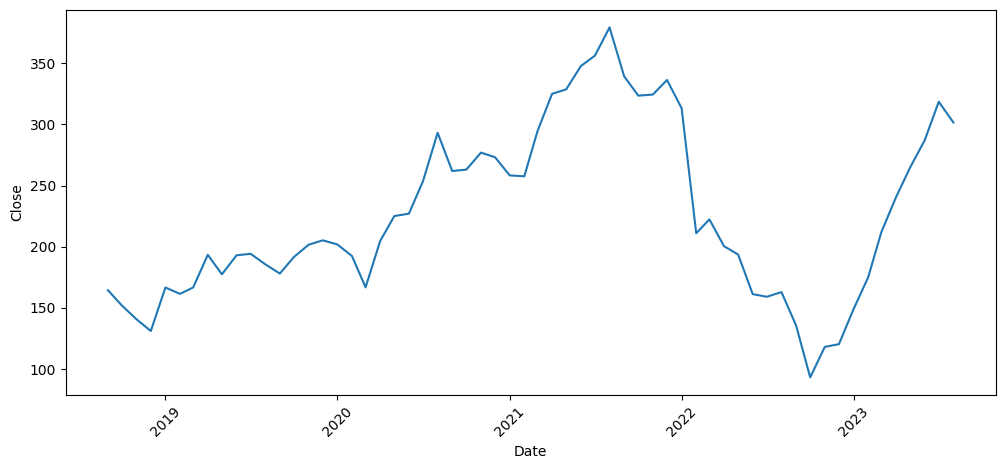

In [11]:
t_figsize = (12,5)
fig, ax = plt.subplots(figsize=t_figsize)
plt.xticks(rotation=45)
sns.lineplot(x= meta.history(period=str_period,
                             interval=str_interval).index,
             y= msft.history(period=str_period,
                             interval=str_interval)['Close'],
             ax= ax)

In [12]:
meta.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-12 00:00:00-04:00,301.750000,309.450012,300.100006,309.339996,36677100,0.0,0.0
2023-07-13 00:00:00-04:00,313.619995,316.239990,310.290009,313.410004,30281000,0.0,0.0
2023-07-14 00:00:00-04:00,311.790009,314.880005,307.359985,308.869995,22576000,0.0,0.0
2023-07-17 00:00:00-04:00,307.540009,311.709991,304.709991,310.619995,25323100,0.0,0.0
2023-07-18 00:00:00-04:00,310.880005,314.200012,307.619995,312.049988,20764600,0.0,0.0
2023-07-19 00:00:00-04:00,313.029999,318.679993,310.519989,316.010010,21763700,0.0,0.0
2023-07-20 00:00:00-04:00,313.500000,315.540009,302.220001,302.519989,23836900,0.0,0.0
2023-07-21 00:00:00-04:00,304.570007,305.459991,291.200012,294.260010,42089700,0.0,0.0
2023-07-24 00:00:00-04:00,295.779999,297.519989,288.299988,291.609985,24915700,0.0,0.0


# Get S&P 500 stock tickers

In [13]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_sp500_co_info = table[0]
df_sp500_co_info.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
df_sp500_co_info['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

https://www.marketdata.app/how-to-use-the-yahoo-finance-api/

# Get Multiple Ticker Price Data

## Put S&P 500 tickers into a string

In [14]:
# If the below download fails, then it might be because of the replacement of . with -
str_sp500_stk_tkrs= ' '.join(i if '.' not in i else i.replace('.','-') for i in df_sp500_co_info['Symbol'])
print('Number of tickers in sp500:', len(df_sp500_co_info['Symbol']), '\n')
str_sp500_stk_tkrs

Number of tickers in sp500: 503 



'MMM AOS ABT ABBV ACN ATVI ADM ADBE ADP AAP AES AFL A APD AKAM ALK ALB ARE ALGN ALLE LNT ALL GOOGL GOOG MO AMZN AMCR AMD AEE AAL AEP AXP AIG AMT AWK AMP ABC AME AMGN APH ADI ANSS AON APA AAPL AMAT APTV ACGL ANET AJG AIZ T ATO ADSK AZO AVB AVY AXON BKR BALL BAC BBWI BAX BDX WRB BRK-B BBY BIO TECH BIIB BLK BK BA BKNG BWA BXP BSX BMY AVGO BR BRO BF-B BG CHRW CDNS CZR CPT CPB COF CAH KMX CCL CARR CTLT CAT CBOE CBRE CDW CE CNC CNP CDAY CF CRL SCHW CHTR CVX CMG CB CHD CI CINF CTAS CSCO C CFG CLX CME CMS KO CTSH CL CMCSA CMA CAG COP ED STZ CEG COO CPRT GLW CTVA CSGP COST CTRA CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN DXCM FANG DLR DFS DIS DG DLTR D DPZ DOV DOW DTE DUK DD DXC EMN ETN EBAY ECL EIX EW EA ELV LLY EMR ENPH ETR EOG EPAM EQT EFX EQIX EQR ESS EL ETSY EG EVRG ES EXC EXPE EXPD EXR XOM FFIV FDS FICO FAST FRT FDX FITB FSLR FE FIS FI FLT FMC F FTNT FTV FOXA FOX BEN FCX GRMN IT GEHC GEN GNRC GD GE GIS GM GPC GILD GL GPN GS HAL HIG HAS HCA PEAK HSIC HSY HES HPE HLT HOLX HD HON HRL HST

## Query Multiple Tickers on yahoo finance

In [15]:
str_today = datetime.today().strftime("%Y-%m-%d")

In [16]:
data = yf.download(str_sp500_stk_tkrs, start="2018-01-01", end=str_today)

[*********************100%***********************]  503 of 503 completed


In [17]:
print('data.shape:', data.shape)
data.tail(5)

data.shape: (1412, 3018)


Adj Close                                                        \
                     A    AAL        AAP        AAPL        ABBV         ABC   
Date                                                                           
2023-08-07  126.510002  15.99  71.300003  178.608810  150.330002  186.092728   
2023-08-08  128.350006  16.18  70.559998  179.557526  149.619995  184.885880   
2023-08-09  127.629997  15.76  71.199997  177.949707  150.770004  185.225006   
2023-08-10  127.650002  15.76  71.529999  177.729996  151.440002  187.029999   
2023-08-11  126.860001  15.65  72.279999  177.789993  152.179993  187.369995   

                                                           ...   Volume  \
                   ABT       ACGL         ACN        ADBE  ...     WYNN   
Date                                                       ...            
2023-08-07  108.449997  78.230003  315.869995  529.729980  ...  1650500   
2023-08-08  105.580002  76.349998  315.149994  520.599976  ...  1618200   
2023-08-09  105.300003  77.050003  311.529999  513.780029  ...  3398400   
2023-08-10  104.739998  76.580002  310.410004  515.830017  ...  4171000   
2023-08-11  105.309998  76.599998  309.049988  508.450012  ...  3147100   

                                                                           \
                XEL       XOM     XRAY      XYL      YUM      ZBH    ZBRA   
Date                                                                        
2023-08-07  4222100  12410800   977700  1607200  1152500  1273300  427600   
2023-08-08  3831600  14065600  1110800  1643700  1023500  1787600  521000   
2023-08-09  3892800  19919600  1183600  2877600   889700  1401700  499600   
2023-08-10  2535700  15837200  1157600  1618800  1148900   856500  414000   
2023-08-11  2901100  14043700   832200  1415200   808000  1778300  493200   

                              
               ZION      ZTS  
Date                          
2023-08-07  2492600  1941700  
2023-08-08  3169100  4118000  
2023-08-09  2901900  2270000  
2023-08-10  2381500  2348500  
2023-08-11  2572900  1742900  

[5 rows x 3018 columns]

In [18]:
# convert the index to datetime
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-07-31', '2023-08-01', '2023-08-02', '2023-08-03',
               '2023-08-04', '2023-08-07', '2023-08-08', '2023-08-09',
               '2023-08-10', '2023-08-11'],
              dtype='datetime64[ns]', name='Date', length=1412, freq=None)

In [19]:
#Get today's Date - time stamp closest day
ts_clst_day = data.index[data.index.get_indexer([datetime.today()], method='nearest')]
ts_clst_day

DatetimeIndex(['2023-08-11'], dtype='datetime64[ns]', name='Date', freq=None)

# Create Min/Max Current DataFrame

## Get Adjusted Closing Price

In [24]:
# gets most recent stock price close for each S&P 500 stock
# transforms from a row into a column
df_cur_stkpr = data.loc[ts_clst_day, 'Adj Close'].stack().loc[ts_clst_day,:].copy()
df_cur_stkpr

Date            
2023-08-11  A       126.860001
            AAL      15.650000
            AAP      72.279999
            AAPL    177.789993
            ABBV    152.179993
                       ...    
            YUM     134.199997
            ZBH     123.930000
            ZBRA    261.940002
            ZION     38.299999
            ZTS     190.830002
Length: 503, dtype: float64

In [27]:
# create a dataframe of current stock prices with stock tickers as the index
df_cur_stkpr1 = df_cur_stkpr.loc[ts_clst_day].reset_index().drop(columns='Date').set_index('level_1')
df_cur_stkpr1
#df_cur_stkpr.loc['2023-07-07']
#ts_clst_day[0].strftime('YYYY-MM-DD')

,0
level_1,
A,126.860001
AAL,15.650000
AAP,72.279999
AAPL,177.789993
ABBV,152.179993
...,...
YUM,134.199997
ZBH,123.930000
ZBRA,261.940002


In [ ]:
pd.DataFrame(df_cur_stkpr1).rename(columns={0:'Cur_StkPr'})

,Cur_StkPr
level_1,
A,126.050003
AAL,16.790001
AAP,73.169998
AAPL,195.830002
ABBV,150.850006
...,...
YUM,136.940002
ZBH,139.339996
ZBRA,299.179993


## Transform dataframe

In [28]:
# more the date into the columns
df = data.copy()
df.reset_index(inplace=True)
df.head()

Date  Adj Close                                               \
                      A        AAL         AAP       AAPL       ABBV   
0 2018-01-02  64.865372  51.647564   98.153381  40.776527  75.741035   
1 2018-01-03  66.515800  51.014023   99.041588  40.769428  76.926247   
2 2018-01-04  66.016838  51.335659  102.696083  40.958801  76.487549   
3 2018-01-05  67.072342  51.316177  103.787819  41.425125  77.819038   
4 2018-01-08  67.216263  50.809345  103.056900  41.271259  76.572220   

                                                ...   Volume           \
         ABC        ABT       ACGL         ACN  ...     WYNN      XEL   
0  85.933250  53.380829  29.433332  141.472961  ...  2581200  2443400   
1  86.253067  53.498863  29.459999  142.125885  ...  3530900  4114900   
2  86.061150  53.408066  29.570000  143.808792  ...  2708800  2807000   
3  87.102898  53.562428  29.453333  144.995056  ...  2186600  3728000   
4  88.546692  53.408066  29.456667  146.153778  ...  1803800  3837600   

                                                                          
        XOM     XRAY     XYL      YUM      ZBH    ZBRA     ZION      ZTS  
0  11469300  1622300  877800  1747800  1818259  310600  2387100  2135600  
1  13957700  1533300  778800  2554900  1368664  253000  1575700  2328200  
2  10863000  1052400  796500  1971200  1105396  435200  3309200  2534000  
3  11047600  1329000  666800  1927100  1095302  301800  1212200  2166100  
4  10927100  1188500  554700  1599400  1286985  218600  1697700  3631400  

[5 rows x 3019 columns]

### Convert multi-col index to single-col index

In [29]:
df1 = df.copy()
df1.columns = [' '.join((col[0].replace(' ',''),col[1])).strip() for col in df1.columns.values]
df1.head(1)

,Date,AdjClose A,AdjClose AAL,AdjClose AAP,AdjClose AAPL,AdjClose ABBV,AdjClose ABC,AdjClose ABT,AdjClose ACGL,AdjClose ACN,...,Volume WYNN,Volume XEL,Volume XOM,Volume XRAY,Volume XYL,Volume YUM,Volume ZBH,Volume ZBRA,Volume ZION,Volume ZTS
0,2018-01-02,64.865372,51.647564,98.153381,40.776527,75.741035,85.93325,53.380829,29.433332,141.472961,...,2581200,2443400,11469300,1622300,877800,1747800,1818259,310600,2387100,2135600


### Convert multiple close-type/stock to 2 cols

In [34]:
df2 = df1.melt(id_vars=['Date'], value_vars=df1.columns[1:],).copy()

In [35]:
df2['Value_Type'] =  df2['variable'].str.split(' ').str[0]
df2['Stock_Tkr'] =  df2['variable'].str.split(' ').str[1]
df2.drop(columns=['variable'], inplace=True)
df2 = df2[['Date', 'Value_Type', 'Stock_Tkr', 'value']].copy()
df2.head()

,Date,Value_Type,Stock_Tkr,value
0,2018-01-02,AdjClose,A,64.865372
1,2018-01-03,AdjClose,A,66.515800
2,2018-01-04,AdjClose,A,66.016838
3,2018-01-05,AdjClose,A,67.072342
4,2018-01-08,AdjClose,A,67.216263


In [36]:
# demo conversion of tidy data to user friendly format
df2.loc[df2['Value_Type'] == 'AdjClose'].pivot_table(index='Date',
                                                     columns='Stock_Tkr',
                                                     values='value',
                                                     aggfunc=np.sum)

Stock_Tkr,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,64.865372,51.647564,98.153381,40.776527,75.741035,85.933250,53.380829,29.433332,141.472961,177.699997,...,154.383667,40.838551,64.321686,63.636105,63.698170,73.990036,115.467545,103.709999,43.121277,69.128296
2018-01-03,66.515800,51.014023,99.041588,40.769428,76.926247,86.253067,53.498863,29.459999,142.125885,181.039993,...,152.711105,40.565212,65.584969,63.418125,64.474854,73.926552,116.267967,105.769997,43.070244,69.446159
2018-01-04,66.016838,51.335659,102.696083,40.958801,76.487549,86.061150,53.408066,29.570000,143.808792,183.220001,...,153.537979,40.249165,65.675758,63.408638,64.905312,74.679161,116.100456,107.860001,43.248852,69.860313
2018-01-05,67.072342,51.316177,103.787819,41.425125,77.819038,87.102898,53.562428,29.453333,144.995056,185.339996,...,154.562195,39.967281,65.622810,64.299591,64.783676,75.114388,117.254539,109.540001,43.265865,70.659775
2018-01-08,67.216263,50.809345,103.056900,41.271259,76.572220,88.546692,53.408066,29.456667,146.153778,185.039993,...,152.504379,40.266247,65.917831,64.735588,65.017609,75.241325,117.477928,110.629997,43.053234,71.507401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-07,126.510002,15.990000,71.300003,178.608810,150.330002,186.092728,108.449997,78.230003,315.869995,529.729980,...,105.029999,59.759998,107.199997,39.490002,106.959999,135.110001,125.629997,248.229996,38.139999,180.690002
2023-08-08,128.350006,16.180000,70.559998,179.557526,149.619995,184.885880,105.580002,76.349998,315.149994,520.599976,...,103.070000,59.639999,107.730003,39.380001,105.150002,134.139999,124.860001,253.679993,38.180000,189.300003
2023-08-09,127.629997,15.760000,71.199997,177.949707,150.770004,185.225006,105.300003,77.050003,311.529999,513.780029,...,101.550003,59.689999,109.559998,38.470001,102.330002,133.279999,125.209999,257.890015,37.400002,189.350006


In [38]:
# review old data format
df.head(1)

Date  Adj Close                                                        \
                      A        AAL        AAP       AAPL       ABBV       ABC   
0 2018-01-02  64.865372  51.647564  98.153381  40.776527  75.741035  85.93325   

                                     ...   Volume                              \
         ABT       ACGL         ACN  ...     WYNN      XEL       XOM     XRAY   
0  53.380829  29.433332  141.472961  ...  2581200  2443400  11469300  1622300   

                                                       
      XYL      YUM      ZBH    ZBRA     ZION      ZTS  
0  877800  1747800  1818259  310600  2387100  2135600  

[1 rows x 3019 columns]

In [ ]:
df.loc[df['Date'] == '2020-05-15']

Date  Adj Close                                                    \
                        A   AAL         AAP      AAPL       ABBV        ABC   
596 2020-05-15  79.892403  9.04  117.335686  75.52755  78.830139  82.235764   

                                   ...   Volume                              \
           ABT   ACGL         ACN  ...     WYNN      XEL       XOM     XRAY   
596  85.209892  22.98  175.784576  ...  3885000  5744300  22445600  5570700   

                                                        
        XYL      YUM     ZBH    ZBRA     ZION      ZTS  
596  985200  3998200  881371  383100  2205200  2921700  

[1 rows x 3019 columns]

## Create the Min/Max Dataframe

In [39]:
# Find min/max value index to facilitate getting the date of the min/max
pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmin().values]),
             columns=['5Yr_StkPr_Low_Date'], index=data['Adj Close'].columns)

,5Yr_StkPr_Low_Date
A,2018-06-27
AAL,2020-05-15
AAP,2023-06-09
AAPL,2019-01-03
ABBV,2019-08-15
...,...
YUM,2020-03-23
ZBH,2020-03-18
ZBRA,2018-01-02
ZION,2023-05-04


In [40]:
# Show period low, high, current
df_min_max = pd.concat([pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmin().values]),
             columns=['5Yr_StkPr_Low_Date'], index=data['Adj Close'].columns),
                        pd.DataFrame(data['Adj Close'].min(),
                        columns=['5Yr_StkPr_Low']
                        ),
                        pd.DataFrame(list(data.index[data.reset_index()[['Adj Close']].idxmax().values]),
                                     columns=['5Yr_StkPr_High_Date'],
                                     index=data['Adj Close'].columns),
                        pd.DataFrame(data['Adj Close'].max(),
                                     columns=['5Yr_StkPr_High']),
                        pd.DataFrame(df_cur_stkpr1).rename(columns={0:'Cur_StkPr'})], axis=1)
df_min_max.head()

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr
A,2018-06-27,58.797668,2021-09-03,177.025650,126.860001
AAL,2020-05-15,9.040000,2018-01-12,56.988728,15.650000
AAP,2023-06-09,63.355339,2022-01-06,229.554688,72.279999
AAPL,2019-01-03,34.163822,2023-07-31,196.185074,177.789993
ABBV,2019-08-15,52.443935,2022-04-08,165.176758,152.179993


## Add Company Names

In [41]:
df_min_max_cur= df_min_max.merge(df_sp500_co_info[['Symbol',
                                               'Security']],
                             how='left', left_index= True,
                             right_on='Symbol').copy()
df_min_max_cur.head()

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Symbol,Security
12.0,2018-06-27,58.797668,2021-09-03,177.025650,126.860001,A,Agilent Technologies
29.0,2020-05-15,9.040000,2018-01-12,56.988728,15.650000,AAL,American Airlines Group
9.0,2023-06-09,63.355339,2022-01-06,229.554688,72.279999,AAP,Advance Auto Parts
44.0,2019-01-03,34.163822,2023-07-31,196.185074,177.789993,AAPL,Apple Inc.
3.0,2019-08-15,52.443935,2022-04-08,165.176758,152.179993,ABBV,AbbVie


In [42]:
df_min_max_cur = df_min_max_cur.reset_index().drop(columns='index').copy()
df_min_max_cur

,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Symbol,Security
0,2018-06-27,58.797668,2021-09-03,177.025650,126.860001,A,Agilent Technologies
1,2020-05-15,9.040000,2018-01-12,56.988728,15.650000,AAL,American Airlines Group
2,2023-06-09,63.355339,2022-01-06,229.554688,72.279999,AAP,Advance Auto Parts
3,2019-01-03,34.163822,2023-07-31,196.185074,177.789993,AAPL,Apple Inc.
4,2019-08-15,52.443935,2022-04-08,165.176758,152.179993,ABBV,AbbVie
...,...,...,...,...,...,...,...
498,2020-03-23,53.255268,2023-05-02,142.236282,134.199997,YUM,Yum! Brands
499,2020-03-18,76.251205,2021-04-29,170.515808,123.930000,ZBH,Zimmer Biomet
500,2018-01-02,103.709999,2021-12-10,614.549988,261.940002,ZBRA,Zebra Technologies
501,2023-05-04,19.586090,2022-02-15,70.517998,38.299999,ZION,Zions Bancorporation


In [ ]:
df_min_max_cur= df_min_max_cur[['Symbol', 'Security', '5Yr_StkPr_Low_Date',
                                '5Yr_StkPr_Low', '5Yr_StkPr_High_Date',
                                '5Yr_StkPr_High', 'Cur_StkPr']].copy()

# Find % Decline from High

In [ ]:
df_min_max_cur['Pct_Chg_f_High'] = ((df_min_max_cur['Cur_StkPr']
                                    - df_min_max_cur['5Yr_StkPr_High']
                                    )
                                     /df_min_max_cur['5Yr_StkPr_High']
                                    )
df_min_max_cur

,Symbol,Security,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Pct_Chg_f_High
0,A,Agilent Technologies,2018-06-27,58.797665,2021-09-03,177.025665,126.050003,-0.287956
1,AAL,American Airlines Group,2020-05-15,9.040000,2018-01-12,56.988735,16.790001,-0.705380
2,AAP,Advance Auto Parts,2023-06-09,63.355339,2022-01-06,229.554688,73.169998,-0.681252
3,AAPL,Apple Inc.,2019-01-03,34.209965,2023-07-28,195.830002,195.830002,0.000000
4,ABBV,AbbVie,2019-08-15,52.443920,2022-04-08,165.176773,150.850006,-0.086736
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,2020-03-23,53.255260,2023-05-02,142.236282,136.940002,-0.037236
499,ZBH,Zimmer Biomet,2020-03-18,76.251198,2021-04-29,170.515808,139.339996,-0.182832
500,ZBRA,Zebra Technologies,2018-01-02,103.709999,2021-12-10,614.549988,299.179993,-0.513172
501,ZION,Zions Bancorporation,2023-05-04,19.586090,2022-02-15,70.517990,38.689999,-0.451346


In [ ]:
threshold = -.5

In [ ]:
# try to add the dates that the low and high prices were reached
print(df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].shape, '\n')
df_min_max_cur.loc[(df_min_max_cur['Pct_Chg_f_High'] < threshold)].sort_values(by='Pct_Chg_f_High')

(35, 8) 



,Symbol,Security,5Yr_StkPr_Low_Date,5Yr_StkPr_Low,5Yr_StkPr_High_Date,5Yr_StkPr_High,Cur_StkPr,Pct_Chg_f_High
358,PARA,Paramount Global,2020-03-23,10.181962,2021-03-22,93.145004,15.330000,-0.835418
479,WBD,Warner Bros. Discovery,2022-12-28,8.870000,2021-03-19,77.269997,12.790000,-0.834477
466,VFC,VF Corporation,2023-06-01,16.759623,2020-01-02,88.050568,19.690001,-0.776378
474,VTRS,Viatris,2022-09-27,8.189327,2018-01-22,43.623085,10.400000,-0.761594
388,PYPL,PayPal,2023-05-25,59.369999,2021-07-23,308.529999,73.980003,-0.760218
316,MRNA,Moderna,2019-08-05,12.260000,2021-08-09,484.470001,118.660004,-0.755073
323,MTCH,Match Group,2018-01-16,29.885286,2021-10-21,175.529999,45.599998,-0.740215
85,CCL,Carnival,2022-10-10,6.380000,2018-01-29,66.217583,18.490000,-0.720769
1,AAL,American Airlines Group,2020-05-15,9.040000,2018-01-12,56.988735,16.790001,-0.705380
207,GNRC,Generac,2018-03-01,43.340000,2021-11-01,505.799988,149.899994,-0.703638
